### Libraries

In [ ]:
!pip install bertopic

In [ ]:
!pip install umap

In [1]:
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

import warnings
warnings.filterwarnings("ignore")

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

from bertopic import BERTopic
from umap import UMAP
from wordcloud import WordCloud

### Data

In [2]:
with open("qatar_data_df_preprocessed.pkl", "rb") as fp:
    qatar_data_df = pickle.load(fp)

In [3]:
def listToString(s):  
    str1 = ""   
    for ele in s:  
        str1 += ele+" "    
    return str1  

qatar_data_df[4] = qatar_data_df[3]
for i in range(0,len(qatar_data_df[4])):
    qatar_data_df[4][i] = listToString(qatar_data_df[4][i])

In [4]:
qatar_data_df

,0,1,3,4
0,18 January 2023,"From 172 goals scored, to five billion people ...","[goals, scored, five, billion, people, engaged...",goals scored five billion people engaged host ...
1,12 January 2023,In between 64 matches and 29 days of dramatic ...,"[matches, days, dramatic, action, field, milli...",matches days dramatic action field millions fa...
2,11 January 2023,As fans celebrated and cheered for their favou...,"[fans, celebrated, cheered, favourite, players...",fans celebrated cheered favourite players pitc...
3,5 January 2023,For B4Development (B4D) â a Qatar 2022 legac...,"[bdevelopment, bd, , legacy, project, launch...",bdevelopment bd  legacy project launched sup...
4,3 January 2023,"In 2022, the Generation Amazing Foundation (GA...","[generation, amazing, foundation, ga, , supr...",generation amazing foundation ga  supreme co...
...,...,...,...,...
152,6 September 2022,QNB Group â the largest financial institutio...,"[qnb, group, , largest, financial, instituti...",qnb group  largest financial institution mid...
153,5 September 2022,The FIFA World Cup Qatar 2022â¢ is set to fea...,"[¢, set, feature, teams, appeared, footballâ...",¢ set feature teams appeared footballâ show...
154,4 September 2022,Lusail City keenly illustrates Qatarâs visio...,"[lusail, city, keenly, illustrates, qatarâ, ...",lusail city keenly illustrates qatarâ vision...
155,3 September 2022,"Over 16,000 volunteers, staff and guests come ...","[volunteers, staff, guests, come, together, lu...",volunteers staff guests come together lusail s...


### BERTopic

In [4]:
start = time.time()
# example based on: https://medium.com/grabngoinfo/topic-modeling-with-deep-learning-using-python-bertopic-cf91f5676504

# UMAP algorithm for reducing dimensions of documents' embeddings
# more: https://umap-learn.readthedocs.io/en/latest/parameters.html
umap_model = UMAP(n_neighbors = 15, # number of neighbours to be taken info account when considering word's context
                  n_components = 10, # destinated dimensionality 
                  min_dist = 0.1, # minimum distance apart that words are allowed to be groupped together
                  metric = 'cosine', # the above distance's type
                  random_state = 123)

# more about BERTopic: https://maartengr.github.io/BERTopic/index.html
model = BERTopic(umap_model = umap_model, 
                 language = "english", # BERTopic can operate on different languages, also it can be set to "multilingual"
                 calculate_probabilities = True,
                 top_n_words = 10,
                 n_gram_range=(1,3))

topics, probabilities = model.fit_transform(qatar_data_df[4])
print(time.time()-start)

24.780701637268066


### BERTopic - topics obtained

In [65]:
model.get_topic_info()

,Topic,Count,Name
0,-1,75,-1_fans_hayya_sc_during
1,0,41,0_fans_first_said_arab
2,1,26,1_generation_amazing_legacy_generation amazing
3,2,15,2_stadium_group_lusail_fans


52 Topics were detected.

Topic -1 stands for all the topics together. Count is 1290, i.e. 1290 news were assigned to the topics. There were 3086 documents... It means that 3086 - 1290 = 1796 news were not assigned to any topic!

### BERTopic - top keywords with weights

In [66]:
for k in range(len(model.get_topic_info())):
    print(model.get_topic(k))

[('fans', 0.016882386725172113), ('first', 0.015406854916870449), ('said', 0.013727408331496712), ('arab', 0.013554588113687678), ('players', 0.013226190885068472), ('cup', 0.01214327134055976), ('middle', 0.0095663254300266), ('region', 0.009004515849522228), ('middle east', 0.008943778461052763), ('east', 0.008904575158146574)]
[('generation', 0.015961167203586406), ('amazing', 0.015518183292460425), ('legacy', 0.014488905032011076), ('generation amazing', 0.014415451077429054), ('volunteer', 0.012787900149332227), ('sc', 0.012614988215480823), ('people', 0.011534565429003616), ('work', 0.011166815867118133), ('training', 0.011160349221235398), ('volunteers', 0.010136797553682)]
[('stadium', 0.06239587905045951), ('group', 0.0288125009009205), ('lusail', 0.020353288156211312), ('fans', 0.01834679286982542), ('venue', 0.017536472495330222), ('city', 0.017411176457163918), ('matches', 0.017325484816471146), ('december', 0.01685807807159695), ('during', 0.016071797390232127), ('metro', 

In [67]:
model.visualize_topics()

TypeError: Cannot use scipy.linalg.eigh for sparse A with k >= N. Use scipy.linalg.eigh(A.toarray()) or reduce k.

In [70]:
model.visualize_distribution(probabilities[156], min_probability=0.015)

In [71]:
model.visualize_hierarchy(top_n_topics=10)

In [72]:
model.visualize_barchart(top_n_topics=10,n_words=10, height=300)

## Wordcloud

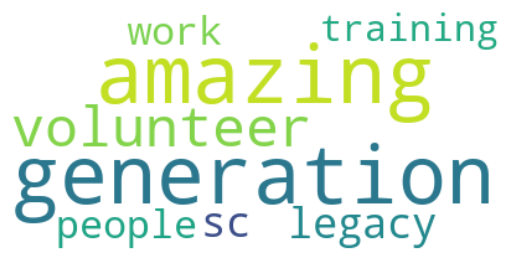

In [11]:
text = " ".join([model.get_topic(1)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic1_qatar_wordcloud.png')
plt.show()

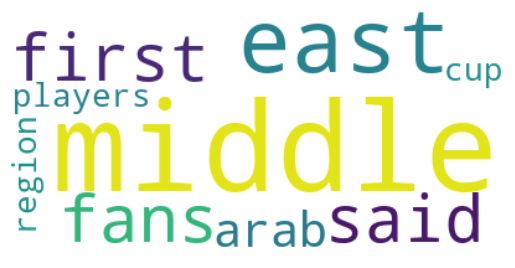

In [7]:
text = " ".join([model.get_topic(0)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic0_qatar_wordcloud.png')
plt.show()

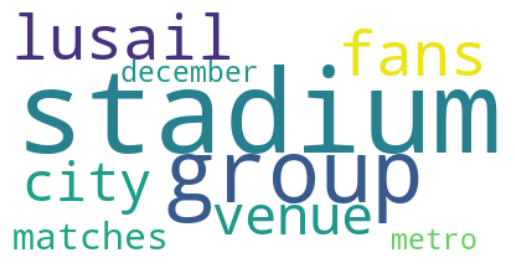

In [5]:
text = " ".join([model.get_topic(2)[k][0] for k in range(10)])
wordcloud = WordCloud(max_font_size=100, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.savefig('bert_topic2_qatar_wordcloud.png')
plt.show()

### BERTopic - representative documents

In [ ]:
model.get_representative_docs()[0]

### Finding topics with certain keyword

In [12]:
model.find_topics("messi")

([0, 1, -1, 3, 4],
 [0.3719430926574459,
  0.3702223028113406,
  0.36546636030486646,
  0.34858405523152447,
  0.339331588127869])

In [16]:
model.get_topic(4)

[('iran', 0.04864030747456193),
 ('us', 0.04471642412356532),
 ('wales', 0.04093634691570424),
 ('its', 0.03951401737655103),
 ('england', 0.037053838904538026),
 ('world', 0.03538241980520269),
 ('team', 0.0353756737896852),
 ('match', 0.03518178045525215),
 ('cup', 0.032657308008140935),
 ('was', 0.02967111345057834)]

### Reducing number of topics

In [ ]:
model.reduce_topics(cnn_data_df[4], nr_topics=20)

In [ ]:
model.get_topic_info()

In [ ]:
model.get_topic(0)

In [ ]:
model.topics_